<a href="https://colab.research.google.com/github/Skp80/vehicle-telematics-clustering/blob/main/data_wrangling_Feature_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
!pip install -U hopsworks --quiet

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import pi # for radar chart

plt.style.use('default')

df = pd.read_csv('./allcars.csv', index_col=0).reset_index(drop=True)

In [183]:
df.head()

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,2017-10-31 18:45:59.000000,0,ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,0.0,0.0,903.0,4.0,NaN,15.686275,1.0
1,2017-10-31 18:46:00.000000,0,00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...,3.7,14.48,NaN,NaN,35.294118,NaN,NaN,0.0,0.0,938.0,6.0,NaN,15.294118,1.0
2,2017-10-31 18:46:01.000000,0,00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...,3.9,14.54,NaN,NaN,29.411765,NaN,NaN,0.0,0.0,1044.5,7.0,NaN,14.901961,1.0
3,2017-10-31 18:46:02.000000,0,0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...,3.9,14.56,NaN,NaN,53.725490,NaN,NaN,0.0,0.0,1102.0,7.0,NaN,17.647059,1.0
4,2017-10-31 18:46:03.000000,0,00a0fde802d816e0370ae73604e23b04e53900e542ffea...,4.7,14.48,NaN,NaN,75.686275,NaN,NaN,0.0,0.0,1626.5,10.0,NaN,23.529412,1.0


## Getting to know our data...

In [184]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027278 entries, 0 to 6027277
Data columns (total 17 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   timeStamp  6027278 non-null  object 
 1   tripID     6027278 non-null  int64  
 2   accData    5868410 non-null  object 
 3   gps_speed  4233446 non-null  float64
 4   battery    4233446 non-null  float64
 5   cTemp      1628373 non-null  float64
 6   dtc        1628373 non-null  float64
 7   eLoad      4233446 non-null  float64
 8   iat        1628373 non-null  float64
 9   imap       1628373 non-null  float64
 10  kpl        4233446 non-null  float64
 11  maf        4233446 non-null  float64
 12  rpm        4233446 non-null  float64
 13  speed      6027277 non-null  float64
 14  tAdv       1628373 non-null  float64
 15  tPos       4233446 non-null  float64
 16  deviceID   6027277 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 781.7+ MB


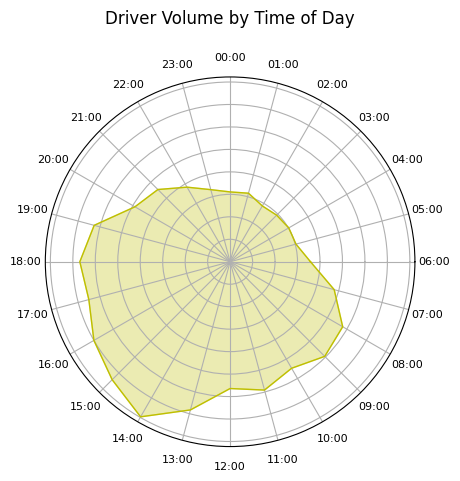

In [185]:
# radar chart to visualize distribution of datapoints by the hour
hour_buckets = pd.to_datetime(df['timeStamp']).dt.hour.value_counts().sort_index()
hours, hour_counts = hour_buckets.index.to_list(), hour_buckets.to_list()

# rotate by 90 degrees counter clockwise so the chart is more
# intuitive, then reverse
hours = (hours[7:] + hours[:7])[::-1]
hour_counts = (hour_counts[7:] + hour_counts[:7])[::-1]

# turn hours into a reader-friendly format
hours = [str(h).zfill(2) + ':00' for h in hours]

hour_counts.append(hour_counts[0])
N = len(hours)
angles = [i / float(N) * 2 * pi for i in range(N)]
angles.append(angles[0])

ax = plt.subplot(polar=True)
plt.title('Driver Volume by Time of Day\n')
plt.xticks(angles[:-1], hours, size=8)
ax.set_yticklabels([])
ax.plot(angles, hour_counts, color='y', linewidth=1)
ax.fill(angles, hour_counts, alpha=0.3, color='y')
plt.savefig('./plots/radar_time.png', bbox_inches='tight')
plt.show()

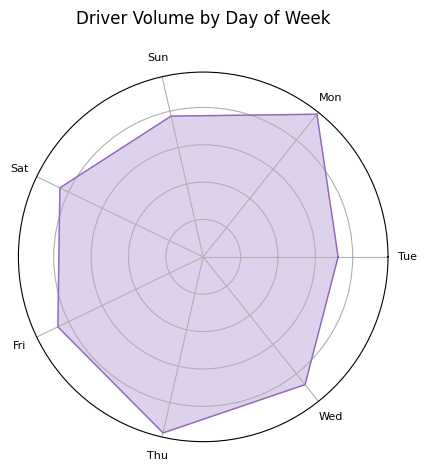

In [186]:
# radar chart to visualize distribution of datapoints by the day of week
wd_buckets = pd.to_datetime(df['timeStamp']).dt.weekday.value_counts().sort_index()
weekdays, wd_counts = wd_buckets.index.to_list(), wd_buckets.to_list()
wd_list = [
    'Mon',
    'Tue',
    'Wed',
    'Thu',
    'Fri',
    'Sat',
    'Sun'
]
weekdays = [wd_list[x] for x in weekdays]

# rotate counter clockwise so the chart is more
# intuitive, then reverse
weekdays = (weekdays[2:] + weekdays[:2])[::-1]
wd_counts = (wd_counts[2:] + wd_counts[:2])[::-1]

wd_counts.append(wd_counts[0])
N = len(weekdays)
angles = [i / float(N) * 2 * pi for i in range(N)]
angles.append(angles[0])

ax = plt.subplot(polar=True)
plt.title('Driver Volume by Day of Week\n')
plt.xticks(angles[:-1], weekdays, size=8)
ax.set_yticklabels([])
ax.plot(angles, wd_counts, color='tab:purple', linewidth=1)
ax.fill(angles, wd_counts, alpha=0.3, color='tab:purple')
plt.show()

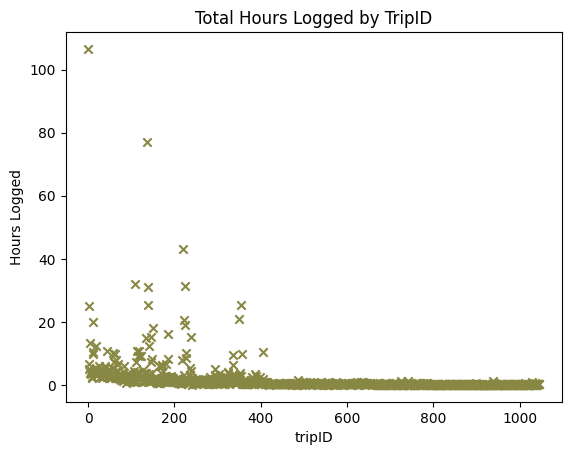

In [187]:
hours_by_trip = df['tripID'].value_counts()/(60*60)
plt.scatter(x=hours_by_trip.index, y=hours_by_trip,
           color='#888844', marker='x')
plt.title('Total Hours Logged by TripID')
plt.xlabel('tripID')
plt.ylabel('Hours Logged')
plt.show()

In [188]:
hours_by_trip.sort_values(ascending=False).head(5)

0      106.571944
136     77.039444
220     43.012222
109     32.011389
224     31.430556
Name: tripID, dtype: float64

In [189]:
trips_to_exclude = set([0, 136, 220, 109, 224])
df = df[~df['tripID'].isin(trips_to_exclude)]

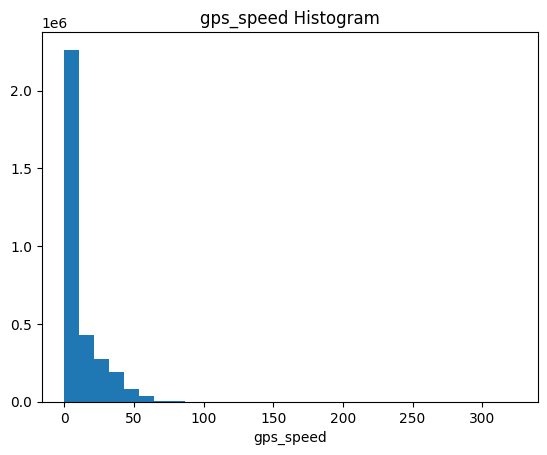

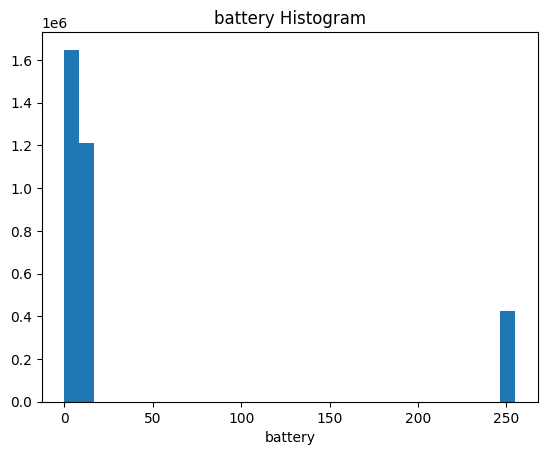

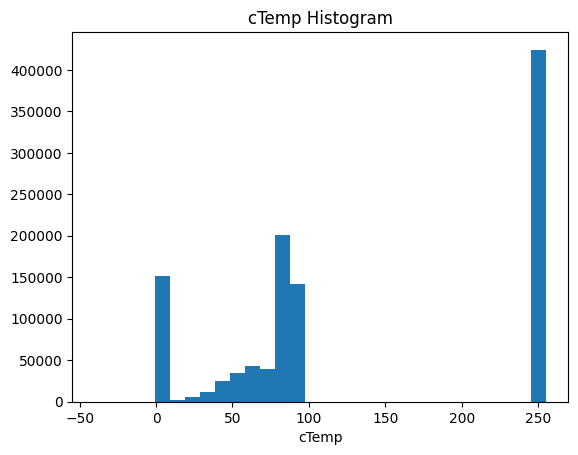

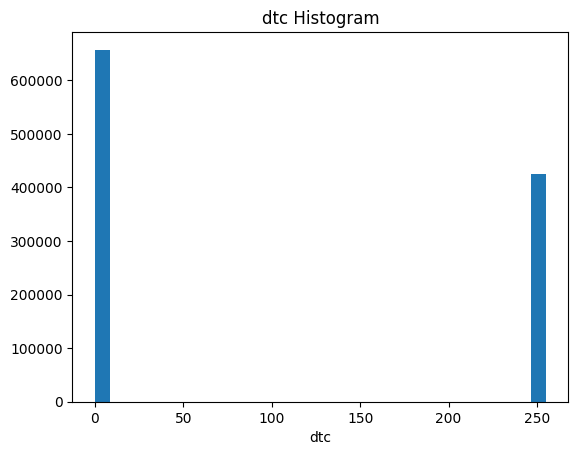

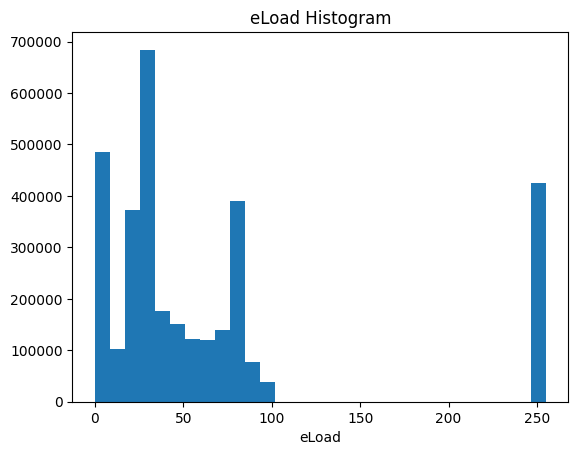

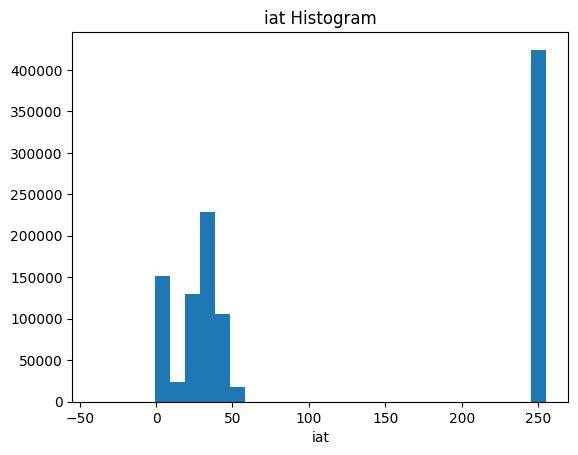

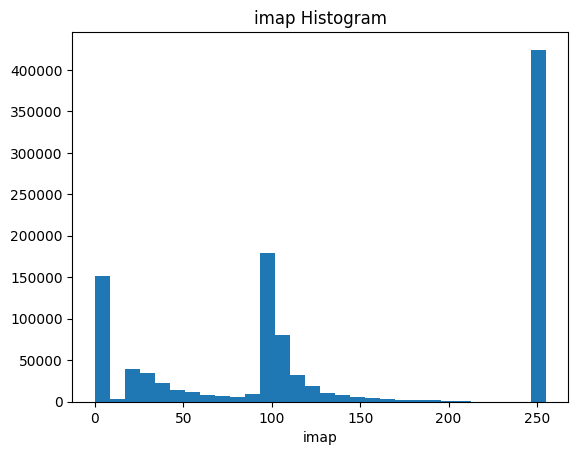

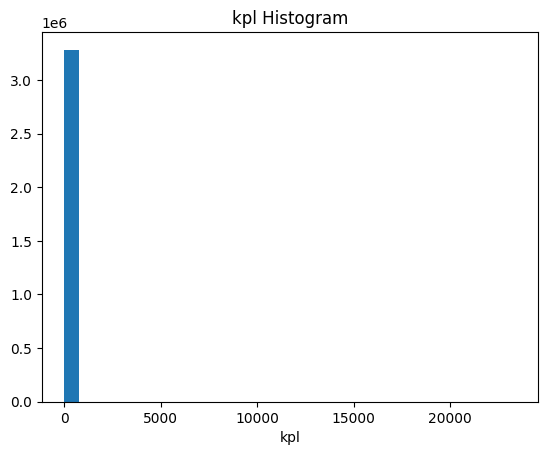

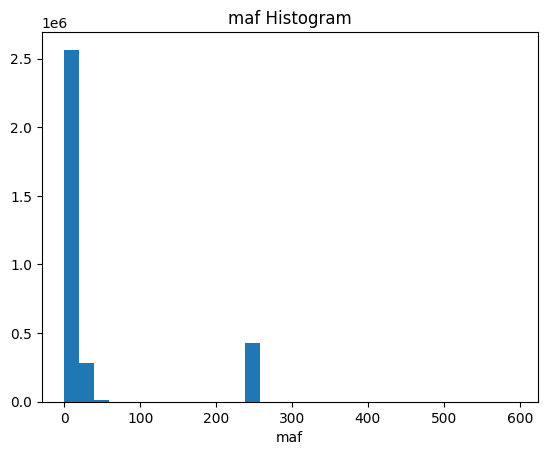

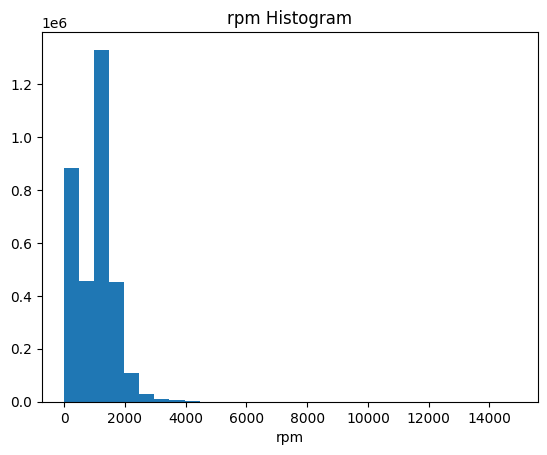

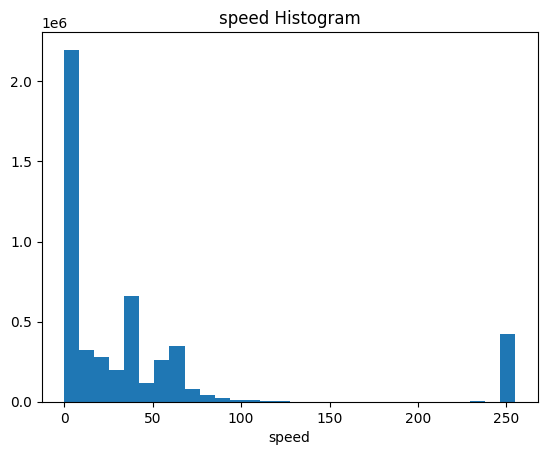

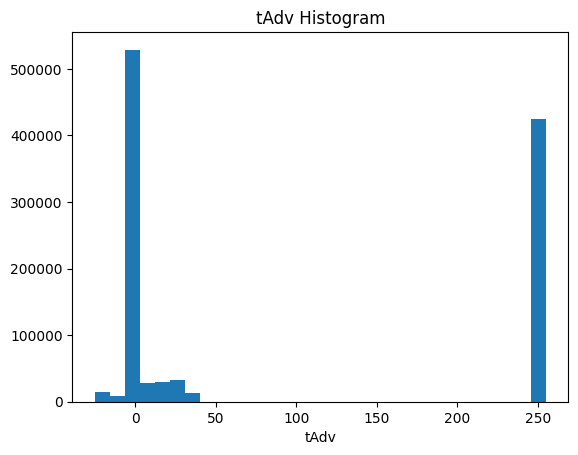

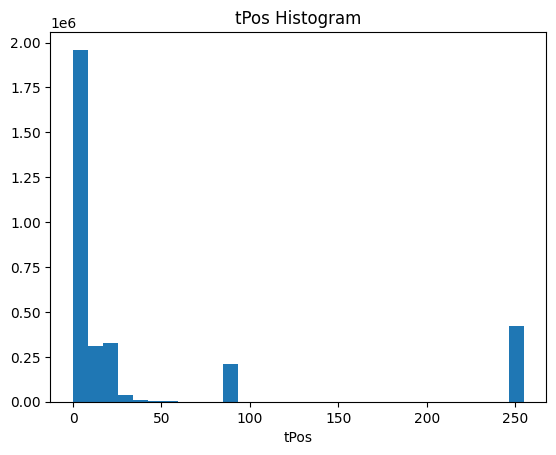

In [190]:
cols_to_not_plot = set([
    'timeStamp',
    'tripID',
    'accData',
    'deviceID'
])

for col in df.columns:
    if col not in cols_to_not_plot:
        plt.hist(df[col], bins=30)
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.show()

## Feature Engineering and Data Reformulation

In [191]:
# timeStamp: used to calculate first derivatives
# rpm: revolutions per minute (engine)
# tPos: position of throttle (gas pedal)
cols_to_use = [
    'timeStamp',
    'tripID',
    'rpm',
    'speed',
    'tPos'
]

df = df[cols_to_use]

In [192]:
# filtering out suspiciously high speed measurements
df = df[df['speed'] < 157]
# tPos has a very thick right tail which is extremely unlikely
df = df[df['tPos'] < 80]
df.loc[:, 'timeStamp'] = pd.to_datetime(df['timeStamp'])

In [221]:
def get_derivative(df, feature_in, feature_out) -> pd.DataFrame:
    '''Gets first derivative of inputted_feature with respect to time'''
    df_out = df.copy()
    df_out['diff'] = df_out[feature_in].diff()
    df_out[feature_out] = df_out['diff'] / df_out['timeDelta']
    df_out.drop('diff', axis=1, inplace=True)
    return df_out

def get_summary_1(df, feature_in) -> list:
    '''Gets various n-th percentile statistics for POSITIVE
    values of a given feature. Values of zero
    exluded in calculation
    '''
    res = []
    df_out = df.copy()
    df_out[feature_in + '_pos'] = df_out[feature_in].map(lambda x : x if x > 0 else np.nan)

    q = [0.1*k for k in range(1, 10)] + [0.9 + 0.01*k for k in range(1, 10)]
    q.extend([0.995, 0.9975, 0.999, 0.9995, 0.99975])
    quantiles = np.nanquantile(df_out[feature_in + '_pos'], q)
    for a, b in zip(q, quantiles):
        label = f'{feature_in}_pos_{a:.6f}'
        res.append((label, b))

    std_label = f'{feature_in}_pos_std'
    res.append((std_label, np.nanstd(df_out[feature_in + '_pos'])))

    return res

def get_summary_2(df, feature_in) -> list:
    '''Gets various n-th percentile statistics for POSITIVE
    AND NEGATIVE values of a given feature. Values of zero
    exluded in calculation'''
    res = []
    df_out = df.copy()
    df_out[feature_in + '_neg'] = df_out[feature_in].map(lambda x: x if x < 0 else np.nan)
    df_out[feature_in + '_pos'] = df_out[feature_in].map(lambda x: x if x > 0 else np.nan)

    q_neg = [0.01*k for k in range(1, 10)] + [0.1*k for k in range(1, 10)]
    q_pos = [0.1*k for k in range(1, 10)] + [0.9 + 0.01*k for k in range(1, 10)]

    quantiles_neg = np.nanquantile(df_out[feature_in + '_neg'], q_neg)
    quantiles_pos = np.nanquantile(df_out[feature_in + '_pos'], q_pos)

    for a, b in zip(q_neg, quantiles_neg):
        label = f'{feature_in}_neg_{a:.2f}'
        res.append((label, b))
    for a, b in zip(q_pos, quantiles_pos):
        label = f'{feature_in}_pos_{a:.2f}'
        res.append((label, b))

    std_neg_label = f'{feature_in}_neg_std'
    res.append((std_neg_label, np.nanstd(df_out[feature_in + '_neg'])))

    std_pos_label = f'{feature_in}_pos_std'
    res.append((std_pos_label, np.nanstd(df_out[feature_in + '_pos'])))

    return res

def clean_trip(df, trip_id, min_datapoints=1800, verbose=False) -> pd.DataFrame:
    '''Given the original DataFrame and a trip_id, returns
    a one-line DataFrame containing a variety of relevant
    statistics pertaining to the trip_id'''
    if verbose:
        print(f'Trying Trip ID {trip_id}')
    df_trip = df.copy()
    # filter on tripID
    df_trip = df_trip[df_trip['tripID'] == trip_id]
    # confirm that data is sorted chronologically
    df_trip.sort_values(by='timeStamp', inplace=True)
    # compute time differential from previous observation
    df_trip['timeDelta'] = df_trip['timeStamp'].diff().dt.total_seconds()
    # only keep values where timeDelta is 1 second
    df_trip = df_trip[(df_trip['timeDelta'] == 1.0)]

    features_to_derive = [
        ('speed', 'accel'),
        ('rpm', 'rpm_d1'), #rpm and its first derivative
        ('tPos', 'tPos_d1') #throttle position and its first derivative
    ]

    # engineer first derivatives for our features wrt time
    for feature_in, feature_out in features_to_derive:
        df_trip = get_derivative(df_trip, feature_in, feature_out)

    # all the new percentile statistics that we need to calculate
    # for the given trip
    all_new_features = {}

    # throttle position and speed cannot be negative, so we're most
    # concerened with right-tail statistics, and we want to exclude
    # values of zero when we calculate these stats
    features_to_summarize_1 = [
        'tPos',
        'speed'
    ]

    # all of these can be positive and negative, and we're interested
    # in extreme values on both sides (e.g. hard braking and hard
    # acceleration) ... again we exclude values of zero since
    # they could distort our results and likely mislead us
    features_to_summarize_2 = [
        'tPos_d1',
        'accel',
        'rpm_d1'
    ]

    # filter out all unreasonably high acceleration values in either
    # direction... likely instrumentation error :(
    # in this case I would consult data engineers and see why we're
    # getting insanely high acceleration metrics... data integrity
    # is paramount and I'd want to clarify these results before
    # continuing any further
    #
    # random sidenote:
    # FYI, the way I actually discovered these crazy high values
    # was when I first ran this notebook WITHOUT the filter and quickly
    # went over the outputted results ... pretty awkward to put in the
    # plot here, but just want to clarify where I got these cutoffs from
    # and why I implemented them
    df_trip = df_trip[(df_trip['accel'] > -70) & (df_trip['accel'] < 50)]

    # exlude trips with less than 30 minutes (by default)
    # of cumulative trip time
    if len(df_trip) < min_datapoints:
        if verbose:
            print(f'Trip ID {trip_id} has insufficent (<{min_datapoints}) datapoints. n={len(df_trip)}')
        return pd.DataFrame()
    else:
        if verbose:
            print(f'Trip ID {trip_id} has sufficent datapoints. Trip summary added. n={len(df_trip)}')

    for feat in features_to_summarize_1:
        new_features = get_summary_1(df_trip, feat)
        for name, value in new_features:
            all_new_features[name] = [value]

    for feat in features_to_summarize_2:
        new_features = get_summary_2(df_trip, feat)
        for name, value in new_features:
            all_new_features[name] = [value]

    df_summarized = pd.DataFrame(all_new_features)
    return df_summarized

In [222]:
# build the DataFrame
df_master = None
trip_ids = set(df['tripID'].values)
for trip_id in trip_ids:
    df_new = clean_trip(df, trip_id)
    if len(df_new) == 1:
        if df_master is None:
            df_master = df_new
        else:
            df_master = pd.concat([df_master, df_new])

In [223]:
df_master2 = df_master
df_master2.head()

,tPos_pos_0.100000,tPos_pos_0.200000,tPos_pos_0.300000,tPos_pos_0.400000,tPos_pos_0.500000,tPos_pos_0.600000,tPos_pos_0.700000,tPos_pos_0.800000,tPos_pos_0.900000,tPos_pos_0.910000,...,rpm_d1_pos_0.92,rpm_d1_pos_0.93,rpm_d1_pos_0.94,rpm_d1_pos_0.95,rpm_d1_pos_0.96,rpm_d1_pos_0.97,rpm_d1_pos_0.98,rpm_d1_pos_0.99,rpm_d1_neg_std,rpm_d1_pos_std
0,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.549020,25.098039,25.882353,...,1195.67,1265.0000,1458.210,1604.500,1708.91,1811.8000,1953.830,2097.860,543.594163,550.058684
0,12.549020,13.725490,14.117647,14.509804,14.509804,14.901961,15.294118,16.470588,20.784314,21.176471,...,1025.20,1144.3000,1188.675,1309.125,1396.30,1440.1875,1472.150,1592.575,451.716791,419.069362
0,12.941176,14.117647,14.509804,15.294118,15.686275,17.254902,19.215686,21.960784,25.882353,26.666667,...,262.97,284.1600,309.300,353.650,405.35,507.1800,786.860,945.840,181.435183,170.976639
0,12.549020,13.333333,13.725490,14.117647,14.117647,14.509804,15.686275,18.039216,21.215686,21.568627,...,287.60,312.7500,347.800,384.000,450.55,532.6250,712.100,901.150,182.723236,176.197449
0,13.725490,14.117647,14.509804,15.529412,16.862745,18.431373,19.607843,20.784314,23.137255,23.529412,...,198.00,217.8375,238.000,262.675,303.09,354.1025,417.275,624.435,164.909006,133.830736


In [224]:
# some final cleaning
df_master.dropna(axis=0, inplace=True)
df_master.reset_index(drop=True, inplace=True)
df_master

,tPos_pos_0.100000,tPos_pos_0.200000,tPos_pos_0.300000,tPos_pos_0.400000,tPos_pos_0.500000,tPos_pos_0.600000,tPos_pos_0.700000,tPos_pos_0.800000,tPos_pos_0.900000,tPos_pos_0.910000,...,rpm_d1_pos_0.92,rpm_d1_pos_0.93,rpm_d1_pos_0.94,rpm_d1_pos_0.95,rpm_d1_pos_0.96,rpm_d1_pos_0.97,rpm_d1_pos_0.98,rpm_d1_pos_0.99,rpm_d1_neg_std,rpm_d1_pos_std
0,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.549020,25.098039,25.882353,...,1195.67,1265.0000,1458.210,1604.500,1708.91,1811.8000,1953.830,2097.860,543.594163,550.058684
1,12.549020,13.725490,14.117647,14.509804,14.509804,14.901961,15.294118,16.470588,20.784314,21.176471,...,1025.20,1144.3000,1188.675,1309.125,1396.30,1440.1875,1472.150,1592.575,451.716791,419.069362
2,12.941176,14.117647,14.509804,15.294118,15.686275,17.254902,19.215686,21.960784,25.882353,26.666667,...,262.97,284.1600,309.300,353.650,405.35,507.1800,786.860,945.840,181.435183,170.976639
3,12.549020,13.333333,13.725490,14.117647,14.117647,14.509804,15.686275,18.039216,21.215686,21.568627,...,287.60,312.7500,347.800,384.000,450.55,532.6250,712.100,901.150,182.723236,176.197449
4,13.725490,14.117647,14.509804,15.529412,16.862745,18.431373,19.607843,20.784314,23.137255,23.529412,...,198.00,217.8375,238.000,262.675,303.09,354.1025,417.275,624.435,164.909006,133.830736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,14.117647,14.509804,15.686275,16.470588,18.431373,19.607843,21.176471,24.235294,39.215686,40.000000,...,161.36,177.0000,194.450,223.650,251.06,283.2950,338.000,397.530,124.950241,86.154735
298,14.117647,14.509804,14.901961,16.078431,18.039216,19.607843,21.176471,23.137255,25.490196,25.882353,...,249.40,277.0000,314.900,355.000,397.80,452.9000,522.600,724.050,174.247466,142.341782
299,13.725490,14.117647,14.509804,14.901961,15.686275,17.254902,18.431373,20.392157,24.705882,25.490196,...,233.00,265.4500,297.600,325.000,362.40,416.7000,470.400,572.400,152.775969,119.295684
300,14.117647,14.509804,15.176471,16.078431,17.254902,18.823529,20.000000,21.176471,25.098039,25.098039,...,192.80,208.0700,221.080,253.200,289.44,383.0600,436.440,570.850,150.848227,109.631811


In [225]:
##display(df_master)
temp_col_name = df_master.columns.to_list()
df_master.rename(columns=lambda x: x[:40], inplace=True) #this will truncate the column name. Then print the dataframe
print (df_master)
df_master.columns = temp_col_name #once you are done printing, rename column name back to original
print (df_master)

     tPos_pos_0.100000  tPos_pos_0.200000  tPos_pos_0.300000  \
0            12.549020          13.725490          13.725490   
1            12.549020          13.725490          14.117647   
2            12.941176          14.117647          14.509804   
3            12.549020          13.333333          13.725490   
4            13.725490          14.117647          14.509804   
..                 ...                ...                ...   
297          14.117647          14.509804          15.686275   
298          14.117647          14.509804          14.901961   
299          13.725490          14.117647          14.509804   
300          14.117647          14.509804          15.176471   
301          14.117647          14.509804          15.294118   

     tPos_pos_0.400000  tPos_pos_0.500000  tPos_pos_0.600000  \
0            14.117647          14.901961          16.078431   
1            14.509804          14.509804          14.901961   
2            15.294118          15.6862

In [198]:
import hopsworks
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/2257
Connected. Call `.close()` to terminate connection gracefully.


In [229]:
import os
os.mkdir('./data')

In [255]:
# export for analysis :)
df_master.to_csv('./data/data_cleaned.csv', index=False)

In [270]:
df_cleaned = pd.read_csv('./data_cleaned_V2.csv', index_col=0).reset_index(drop=False)

In [271]:
df_cleaned.head()

,tPospospoint_10,tPospospoint_20,tPospospoint_30,tPospospoint_40,tPospospoint_50,tPospospoint_60,tPospospoint_70,tPospospoint_80,tPospospoint_90,tPospospoint_91,...,rpmd1point_92,rpmd1point_93,rpmd1point_94,rpmd1point_95,rpmd1point_96,rpmd1point_97,rpmd1point_98,rpmd1point_99,rpm_d1_neg_std,rpm_d1_pos_std
0,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.549020,25.098039,25.882353,...,1195.67,1265.0000,1458.210,1604.500,1708.91,1811.8000,1953.830,2097.860,543.594163,550.058684
1,12.549020,13.725490,14.117647,14.509804,14.509804,14.901961,15.294118,16.470588,20.784314,21.176471,...,1025.20,1144.3000,1188.675,1309.125,1396.30,1440.1875,1472.150,1592.575,451.716791,419.069362
2,12.941176,14.117647,14.509804,15.294118,15.686275,17.254902,19.215686,21.960784,25.882353,26.666667,...,262.97,284.1600,309.300,353.650,405.35,507.1800,786.860,945.840,181.435183,170.976640
3,12.549020,13.333333,13.725490,14.117647,14.117647,14.509804,15.686275,18.039216,21.215686,21.568627,...,287.60,312.7500,347.800,384.000,450.55,532.6250,712.100,901.150,182.723236,176.197449
4,13.725490,14.117647,14.509804,15.529412,16.862745,18.431373,19.607843,20.784314,23.137255,23.529412,...,198.00,217.8375,238.000,262.675,303.09,354.1025,417.275,624.435,164.909006,133.830736


In [263]:
df_clean_list = df_cleaned.columns.to_list()

In [264]:
print(df_clean_list)

['tPospospoint_20', 'tPospospoint_30', 'tPospospoint_40', 'tPospospoint_50', 'tPospospoint_60', 'tPospospoint_70', 'tPospospoint_80', 'tPospospoint_90', 'tPospospoint_91', 'tPospospoint_92', 'tPospospoint_93', 'tPospospoint_94', 'tPospospoint_95', 'tPospospoint_96', 'tPospospoint_97', 'tPospospoint_98', 'tPospospoint_990', 'tPospospoint_995', 'tPospospoint_9975', 'tPospospoint_9990', 'tPospospoint_9950', 'tPospospoint_99975', 'tPos_pos_std', 'speedpospoint_10', 'speedpospoint_20', 'speedpospoint_30', 'speedpospoint_40', 'speedpospoint_50', 'speedpospoint_60', 'speedpospoint_70', 'speedpospoint_80', 'speedpospoint_90', 'speedpospoint_91', 'speedpospoint_92', 'speedpospoint_93', 'speedpospoint_94', 'speedpospoint_95', 'speedpospoint_96', 'speedpospoint_97', 'speedpospoint_98', 'speedpospoint_990', 'speedpospoint_995', 'speedpospoint_9975', 'speedpospoint_9990', 'speedpospoint_9950', 'speedpospoint_99975', 'speed_pos_std', 'tPosd1point_not_10', 'tPosd1point_not_20', 'tPosd1point_not_30', 

In [272]:
tripdetails_fg = fs.get_or_create_feature_group(
    name="ge_trip_fg",
    version=1,
    description="trip information data",
    primary_key=['tPospospoint_10']
)

In [273]:
job, _ = tripdetails_fg.insert(df_cleaned)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/2257/fs/2202/fg/91727


Uploading Dataframe: 0.00% |          | Rows 0/302 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: ge_trip_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/2257/jobs/named/ge_trip_fg_1_offline_fg_backfill/executions


# In the next steps we would be training a model from the data stored in the feature Store. Please refer to the Notebook "Modelling.ipynb"